In [1]:
# conda install -c conda-forge gym
import gym
import matplotlib.pyplot as plt
import numpy as np

### Create environment and get basic info from Pole Cart

In [2]:
env = gym.make("CartPole-v1")
obs = env.reset()

print(obs)
# [cart horizontal position (0.0) center, velocity (+ means right, - means left), angle of pole (0.0) is vertical,
# angular velocity + means clockwise]

[ 0.04633886  0.01784113 -0.00598478 -0.02050882]


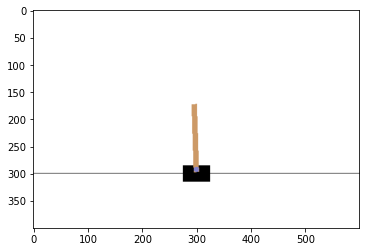

In [3]:
img = env.render(mode="rgb_array")
plt.imshow(img)

In [4]:
# available actions in the environment 

# 0 for accelerate left and 1 to right.
env.action_space

Discrete(2)

### Perform Acceleration to the Right

obs [-0.00304781  0.20069346 -0.03112653 -0.26215798]
reward 1.0
done False
info {}


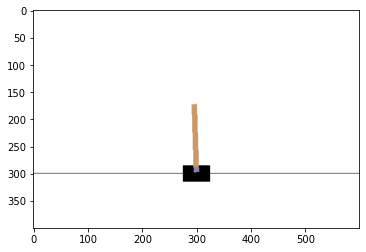

In [5]:
action = 1 # to the right

obs, reward, done, info = env.step(action)

print("obs", obs) # new observation for the CartPole
print("reward", reward) # every movement gives a reward (1.0) 
print("done", done) # indicator that the pole is off screen or tilted too much
print("info", info) # extra information for debugging.

img = env.render(mode="rgb_array")
plt.imshow(img)

### Basic Policy. 

The cart accelerates left if pole is leaning toward right and vice-versa.

In [3]:
def basic_policy(obs):
    angle = obs[2] # angle of the pole
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)
    env.render()
    
print("mean",np.mean(totals))
print("std",np.std(totals))
print("min",np.min(totals))
print("max",np.max(totals))

mean 42.276
std 8.976849335930732
min 24.0
max 72.0


max tells with 500 episodes, that the policy never managed to get the pole straight for more than X steps. (for example max = 66)